## Demo: Wrapped single_run_process
The basic steps to set up an OpenCLSim simulation are:
* Import libraries
* Initialise simpy environment
* Define object classes
* Create objects
  * Create sites
  * Create vessels
  * Create activities
* Register processes and run simpy

----

This notebook provides an example of a single_run_process. In the single_run_process a typical "loading-sailing full-unloading-sailing empty" is pre-packed in a while activity. 

#### 0. Import libraries

In [1]:
import datetime, time
import simpy

import shapely.geometry
import pandas as pd

import openclsim.core as core
import openclsim.model as model
import openclsim.plot as plot

#### 1. Initialise simpy environment

In [2]:
# setup environment
simulation_start = 0
my_env = simpy.Environment(initial_time=simulation_start)

#### 2. Define object classes

In [3]:
# create a Site object based on desired mixin classes
Site = type(
    "Site",
    (
        core.Identifiable,
        core.Log,
        core.Locatable,
        core.HasContainer,
        core.HasResource,
    ),
    {},
)

# create a TransportProcessingResource object based on desired mixin classes
TransportProcessingResource = type(
    "TransportProcessingResource",
    (
        core.Identifiable,
        core.Log,
        core.ContainerDependentMovable,
        core.Processor,
        core.HasResource,
        core.LoadingFunction,
        core.UnloadingFunction,
    ),
    {},
)

#### 3. Create objects
##### 3.1. Create site object(s)

In [4]:
# prepare input data for from_site
location_from_site = shapely.geometry.Point(4.18055556, 52.18664444)
data_from_site = {"env": my_env,
                  "name": "from_site",
                  "geometry": location_from_site,
                  "capacity": 10_000,
                  "level": 10_000
                 }
# instantiate from_site 
from_site = Site(**data_from_site)

# prepare input data for to_site
location_to_site = shapely.geometry.Point(4.25222222, 52.11428333)
data_to_site = {"env": my_env,
                "name": "to_site",
                "geometry": location_to_site,
                "capacity": 10_000,
                "level": 0
               }
# instantiate to_site 
to_site = Site(**data_to_site)

##### 3.2. Create vessel object(s)

In [5]:
# prepare input data for vessel_01
data_vessel01 = {"env": my_env,
                 "name": "vessel01",
                 "geometry": location_from_site, 
                 "loading_rate": 1,
                 "unloading_rate": 5,
                 "capacity": 1_000,
                 "compute_v": lambda x: 10 + 2 * x
               }
# instantiate vessel_01 
vessel01 = TransportProcessingResource(**data_vessel01)

##### 3.3 Create activity/activities

In [6]:
# initialise registry
registry = {}

In [7]:
# create a 'while activity' that contains a pre-packed set of 'sub_processes'
single_run, while_activity  = model.single_run_process(
    name="single_run",
    registry={},
    env=my_env,
    origin=from_site,
    destination=to_site,
    mover=vessel01,
    loader=vessel01,
    unloader=vessel01
)

#### 4. Register processes and run simpy

In [8]:
# initate the simpy processes defined in the 'while activity' and run simpy
model.register_processes([while_activity])
my_env.run()

#### 5. Inspect results
##### 5.1 Inspect logs

In [9]:
display(plot.get_log_dataframe(vessel01, [*single_run, while_activity]))

,Activity,Timestamp,ActivityState,geometry,container level
0,single_run sailing empty,1970-01-01 00:00:00.000000,START,POINT (4.18055556 52.18664444),0.0
1,single_run sailing empty,1970-01-01 00:00:00.000000,STOP,POINT (4.18055556 52.18664444),0.0
2,single_run loading,1970-01-01 00:00:00.000000,START,POINT (4.18055556 52.18664444),0.0
3,single_run loading,1970-01-01 00:16:40.000000,STOP,POINT (4.18055556 52.18664444),1000.0
4,single_run sailing filled,1970-01-01 00:16:40.000000,START,POINT (4.18055556 52.18664444),1000.0
...,...,...,...,...,...
75,single_run loading,1970-01-01 07:35:56.605756,STOP,POINT (4.18055556 52.18664444),1000.0
76,single_run sailing filled,1970-01-01 07:35:56.605756,START,POINT (4.18055556 52.18664444),1000.0
77,single_run sailing filled,1970-01-01 07:49:02.292915,STOP,POINT (4.25222222 52.11428333),1000.0
78,single_run unloading,1970-01-01 07:49:02.292915,START,POINT (4.25222222 52.11428333),1000.0


In [10]:
display(plot.get_log_dataframe(from_site, [*single_run]))

,Activity,Timestamp,ActivityState,container level,geometry
0,single_run loading,1970-01-01 00:00:00.000000,START,10000.0,POINT (4.18055556 52.18664444)
1,single_run loading,1970-01-01 00:16:40.000000,STOP,9000.0,POINT (4.18055556 52.18664444)
2,single_run loading,1970-01-01 00:48:48.511751,START,9000.0,POINT (4.18055556 52.18664444)
3,single_run loading,1970-01-01 01:05:28.511751,STOP,8000.0,POINT (4.18055556 52.18664444)
4,single_run loading,1970-01-01 01:37:37.023501,START,8000.0,POINT (4.18055556 52.18664444)
5,single_run loading,1970-01-01 01:54:17.023501,STOP,7000.0,POINT (4.18055556 52.18664444)
6,single_run loading,1970-01-01 02:26:25.535252,START,7000.0,POINT (4.18055556 52.18664444)
7,single_run loading,1970-01-01 02:43:05.535252,STOP,6000.0,POINT (4.18055556 52.18664444)
8,single_run loading,1970-01-01 03:15:14.047003,START,6000.0,POINT (4.18055556 52.18664444)
9,single_run loading,1970-01-01 03:31:54.047003,STOP,5000.0,POINT (4.18055556 52.18664444)


In [11]:
display(plot.get_log_dataframe(to_site, [*single_run]))

,Activity,Timestamp,ActivityState,container level,geometry
0,single_run unloading,1970-01-01 00:29:45.687159,START,0.0,POINT (4.25222222 52.11428333)
1,single_run unloading,1970-01-01 00:33:05.687159,STOP,1000.0,POINT (4.25222222 52.11428333)
2,single_run unloading,1970-01-01 01:18:34.198910,START,1000.0,POINT (4.25222222 52.11428333)
3,single_run unloading,1970-01-01 01:21:54.198910,STOP,2000.0,POINT (4.25222222 52.11428333)
4,single_run unloading,1970-01-01 02:07:22.710661,START,2000.0,POINT (4.25222222 52.11428333)
5,single_run unloading,1970-01-01 02:10:42.710661,STOP,3000.0,POINT (4.25222222 52.11428333)
6,single_run unloading,1970-01-01 02:56:11.222411,START,3000.0,POINT (4.25222222 52.11428333)
7,single_run unloading,1970-01-01 02:59:31.222411,STOP,4000.0,POINT (4.25222222 52.11428333)
8,single_run unloading,1970-01-01 03:44:59.734162,START,4000.0,POINT (4.25222222 52.11428333)
9,single_run unloading,1970-01-01 03:48:19.734162,STOP,5000.0,POINT (4.25222222 52.11428333)


##### 5.2 Visualise gantt charts

In [12]:
plot.get_gantt_chart([while_activity, vessel01, *single_run])

##### 5.3 Visualise step charts

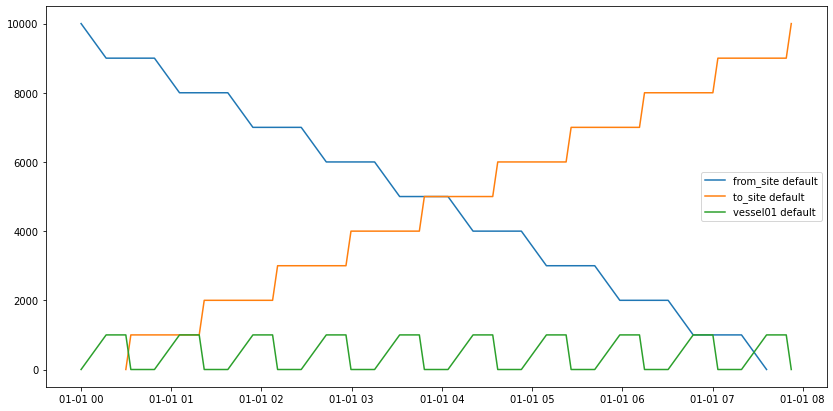

In [13]:
fig = plot.get_step_chart([from_site, to_site, vessel01])

You can observe in the step chart that the loading rate of vessel01 is 1 and the unloading rate is 5. This is clearly visible in the longer time it takes to transfer the cargo from from_site to vessel01, than it takes to transfer the cargo from vessel_1 to to_site.  